# INTRODUCTION 
In this kernel, we understand the influence of the parents background, test preparation etc on students performance.
There are 8 attributes. 
* gender
* race/ethnicity
* parental level of education
* lunch
* test preparation course
* math score
* reading score
* writing score


1. [Load and Understand Data](#1)
1. [Visualization](#2)
1. [Feature Engineering](#3)
1. [Machine Learning Methods](#4)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a>
## Load and Understand Data

In [ ]:
data = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
print(data.columns)
data = data.rename(columns = {"race/ethnicity" : "race", "parental level of education" : "parent_education", "test preparation course" : "preparation", "math score" : "math",
            "reading score" : "reading", "writing score" : "writing"})

In [ ]:
data.head(10)

In [ ]:
data.describe()

I add a new feature named "total score" which stores the total score taken from tests.

In [ ]:
data["total_score"]  = data["math"] + data["reading"] + data["writing"]

In [ ]:
data.gender.unique()

    I changed the gender values, if gender is "female" the new value of row is 1, otherwise 0.

In [ ]:
data.gender = [1 if each == "female" else 0 for each in data.gender]

In [ ]:
data["race"].unique()

There are 5 different type of race.

In [ ]:
data.lunch.unique()

In [ ]:
data.preparation.unique()

In [ ]:
data.parent_education.unique()

In the code below, we can see the races and their mean scores on the math and also other tests.

In [ ]:
data[["race", "math"]].groupby("race", as_index = False).mean().sort_values(by = "math", ascending = True)

In [ ]:
data[["race", "reading"]].groupby("race", as_index = False).mean().sort_values(by = "reading", ascending = True)

In [ ]:
data[["race", "writing"]].groupby("race", as_index = False).mean().sort_values(by = "writing", ascending = True)

For three types of test, we can see that the which students are in "group E", they have much higher mean score than others.

In [ ]:
data[["race", "writing", "reading" , "math"]].groupby("race", as_index = False).mean().sort_values(by = "writing", ascending = True)

Our goal is to see the effect of the parent's education levels on the students test score. Then,

In [ ]:
data[["parent_education", "writing", "reading" , "math"]].groupby("parent_education", as_index = False).mean().sort_values(by = "writing", ascending = True)

We can see the parent's which have more education level, their childrens get more points both three type of tests.

In [ ]:
data[["parent_education", "preparation", "writing", "reading" , "math"]].groupby(["parent_education", "preparation"], as_index = False).mean().sort_values(by = "parent_education", ascending = True)

Including preparation column to the filter does not change anything. Both completed and none type of students gets more points when their parents education level is higher. But in same level students, preparation is important.

In [ ]:
data[["parent_education", "lunch", "writing", "reading" , "math"]].groupby(["parent_education", "lunch"], as_index = False).mean().sort_values(by = "parent_education", ascending = True)

Lunch type gives us same effect like preparation.

In [ ]:
data[["parent_education", "lunch", "total_score"]].groupby(["parent_education", "lunch"], as_index = False).mean().sort_values(by = "total_score", ascending = True)

In [ ]:
data[["parent_education","writing", "reading" , "math", "total_score"]].groupby(["parent_education"], as_index = False).mean().sort_values(by = "total_score", ascending = True)

In [ ]:
data[["parent_education", "preparation", "total_score"]].groupby(["parent_education", "preparation"], as_index = False).mean().sort_values(by = "total_score", ascending = True)

In [ ]:
data[["parent_education", "race", "total_score"]].groupby(["parent_education", "race"], as_index = False).mean().sort_values(by = "total_score", ascending = True)

<a id = "2"></a>
## Visualization

In [ ]:
sns.heatmap(data.corr(), annot = True, linewidth = 0.5,linecolor = "cyan")
plt.plot()

As I aspect, the math, writing, reading and total score have strong relationship between them.

In [ ]:
sns.countplot(x = "gender", data = data)
plt.show()

In [ ]:
sns.countplot(x = "lunch", data = data)
plt.show()

In [ ]:
sns.countplot(x = "race", data = data)
plt.show()

Data is balanced according to genders.

In [ ]:
sns.countplot(x = "parent_education", data = data, palette = sns.cubehelix_palette(len(data[:])))
plt.xticks(rotation = 90)
plt.xlabel("Parent Education Status")
plt.ylabel("Count")
plt.title("Parent Education - Count")
plt.show()

The parents have master degree is more less than the other education types.

In [ ]:
g = sns.factorplot(x = "preparation" , y = "total_score", data = data, kind = "bar")
g.set_ylabels("Total Score")
plt.show()

The students have not been prepared to test takes at most 200 points, but the students have been prepared to test takes more than 200 point.

In [ ]:
g = sns.factorplot(x = "parent_education" , y = "total_score", data = data, kind = "bar")
g.set_ylabels("Total Score")
plt.xticks(rotation = 90)
plt.show()

Students which parents education level is bachelor or master takes more points total in tests.

In [ ]:
data.head()

In [ ]:
trace1 = go.Bar(
    x = data.race,
    y = data.total_score,
    name = "Race",
    marker = dict(color = 'rgba(255, 174, 255, 0.5)',line=dict(color='rgb(0,0,0)',width=1.5)),
    text = data.race
)

trace2 = go.Bar(
    x = data.parent_education,
    y = data.total_score,
    name = "Parents Education Level",
    marker = dict(color = 'rgba(255, 255, 128, 0.5)',line=dict(color='rgb(0,0,0)',width=1.5)),
    text = data.parent_education
)
datas = [trace1, trace2]
layout =  go.Layout(barmode = 'relative')
fig = go.Figure(data = datas, layout = layout)
iplot(fig)

In [ ]:
group_a = data.parent_education[data.race == "group A"].value_counts()
group_b = data.parent_education[data.race == "group B"].value_counts()
group_c = data.parent_education[data.race == "group C"].value_counts()
group_d = data.parent_education[data.race == "group D"].value_counts()
group_e = data.parent_education[data.race == "group E"].value_counts()
groups = [group_a, group_b, group_c, group_d, group_e]

In [ ]:
def plott(groups):
    for group in groups:
        plt.plot(group.index, group.values, color = "cyan")
        plt.xlabel("Education Level ")
        plt.ylabel("Counts")
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
plott(groups)

<a id = "3"></a>
## Feature Engineering
In this part, I will modify the feature indexes for machine learning.

In [ ]:
data.head(10)

In first part of the kernel, I modified the gender column. For females I wrote 1 and 0 for man.

### Race

In [ ]:
data.race = [1 if each == "group A" else 2 if each == "group B" else 3 if each == "group C" else 4 if each == "group D" else 5 for each in data.race]

In [ ]:
data.head(10)

### Parent Education

In [ ]:
data.parent_education.unique()

For parent education type, there are 6 different values.
* bachelor's degree -- 3
* some college -- 2
* master's degree -- 4
* associate's degree -- 2
* high school -- 1
* some high school -- 1

I concatinate the some high school and high school values. Also I concatinate the some college and associate's degree. Because according the previous inspections on data shows that the there is no big change on the mean's of these values.

In [ ]:
data.parent_education = ["high school" if each == "some high school" else "associate's degree" if each == "some college" else each for each in data.parent_education]

In [ ]:
data.parent_education = [1 if each == "high school" else 2 if each == "associate's degree" else 3 if each == "bachelor's degree" else 4 for each in data.parent_education]

### Lunch
* standard -- 1
* free/reduced -- 0

In [ ]:
data.lunch.unique()

In [ ]:
data.lunch = [1 if each == "standard" else 0 for each in data.lunch]

### Preparation
* none -- 0
* completed -- 1

In [ ]:
data.preparation.unique()

In [ ]:
data.preparation = [0 if each == "none" else 1 for each in data.preparation]

In [ ]:
data.head()

<a id = "4"></a>
## Machine Learning Methods

In [ ]:
plt.plot(data.gender, data.parent_education)
plt.show()

### Train - Test Data Preparation

In [ ]:
x = data.iloc[:,0:8]
y = data.iloc[:, 8].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Linear Regression
In this dataset, we can see the strong relationship between math, reading, writing and the total score columns.

In [ ]:
plt.scatter(data.reading, data.total_score)
plt.show()

In the plot above, we can see the relationship between the reading points and total score. 

In [ ]:
xt_linear = x["reading"].values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(xt_linear, y)

In [ ]:
print("b0" , linear.intercept_)
print("Slope : " ,linear.coef_)


In [ ]:
x_test_n = np.arange(min(xt_linear), max(xt_linear), 0.1).reshape(-1,1)
y_head = linear.predict(x_test_n)

In [ ]:
plt.scatter(data.reading, data.total_score)
plt.plot(x_test_n, y_head, color = "red")
plt.show()

### Logistic Regression
Logistic regression can make binary regression, so in this dataset we can try to predict the gender of students.

In [ ]:
x_l = data.drop("gender", axis = 1).values
y_l = data.loc[:, "gender"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_tl, x_tel, y_tl, y_tel = train_test_split(x_l, y_l, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 42, max_iter= 300)
logistic.fit(x_tl, y_tl)

In [ ]:
print("Score : ", logistic.score(x_tel, y_tel))

### Decision Tree Regression - Classification
Regression can predict the taken total number from the tests. Classification is to classify data, so we can use same data as logistic regression.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

In [ ]:
print("Score : ", dtr.score(x_test, y_test))

For the classification part, we try to predict students gender.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(x_tl, y_tl)

In [ ]:
print("Score : ", dtc.score(x_tel, y_tel))

We can calculate the confusion matrix for classificaiton part.

In [ ]:
y_true = y_tel
y_head = dtc.predict(x_tel)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_head)

In [ ]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Random Forest Regression - Classification

In [ ]:
y_train_r = y_train.ravel()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train, y_train_r)

In [ ]:
print("Score : ", rfr.score(x_test, y_test))

For the classification part, we try to predict students gender.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(x_tl, y_tl)

In [ ]:
print("Score : ", rfc.score(x_tel, y_tel))

In [ ]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### SVM
SVM used for make binary classification. There is a decision boundary. Decision boundary: anything that falls to one side of it we will classify as blue, and anything that falls to the other as red. 
In this part, we try to predict student's gender according the other attributes.

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_tl, y_tl)

In [ ]:
print("Score : ", svm.score(x_tel, y_tel))

In [ ]:
y_true = y_tel
y_head = svm.predict(x_tel)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_head)

In [ ]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Naive Bayes
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.
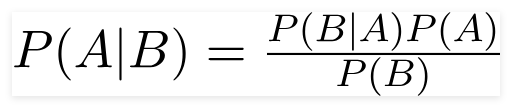
Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

* Gaussian Naive Bayes: When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

In [ ]:
y_tl_nb = y_tl.ravel()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_tl, y_tl_nb)

In [ ]:
print("Score : ", nb.score(x_tel, y_tel))

In [ ]:
y_true = y_tel
y_head = nb.predict(x_tel)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_head)

In [ ]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()